In [1]:
# # Step 1: Import libraries
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import shap
# import warnings
# warnings.filterwarnings("ignore")

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.metrics import classification_report, confusion_matrix

# # Step 2: Load the dataset
# df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# # Step 3: Drop customerID (not useful for prediction)
# df.drop("customerID", axis=1, inplace=True)

# # Step 4: Convert TotalCharges to numeric
# df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
# df.dropna(subset=["TotalCharges"], inplace=True)

# # Step 5: Encode binary columns (Yes/No to 1/0)
# binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
# df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0})

# # Step 6: Encode gender
# df["gender"] = df["gender"].map({"Female": 1, "Male": 0})

# # Step 7: One-Hot Encoding for multi-class columns
# multi_cols = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
#               "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
#               "Contract", "PaymentMethod"]
# df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

# # Step 8: EDA - Visualize Churn and Tenure Distribution
# sns.countplot(x='Churn', data=df)
# plt.title("Churn Distribution")
# plt.show()

# sns.histplot(df['tenure'], bins=30, kde=True)
# plt.title("Tenure Distribution")
# plt.show()

# # Step 9: Prepare Features and Target
# X = df.drop("Churn", axis=1)
# y = df["Churn"]

# # Step 10: Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 11: Feature Scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Step 12: Train models
# models = {
#     "Logistic Regression": LogisticRegression(class_weight='balanced'),
#     "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
#     "Gradient Boosting": GradientBoostingClassifier(random_state=42)
# }

# # Step 13: Evaluate models
# for name, model in models.items():
#     if name == "Logistic Regression":
#         model.fit(X_train_scaled, y_train)
#         preds = model.predict(X_test_scaled)
#     else:
#         model.fit(X_train, y_train)
#         preds = model.predict(X_test)
    
#     print(f"\n📊 {name} Classification Report:")
#     print(classification_report(y_test, preds))
#     print("Confusion Matrix:")
#     print(confusion_matrix(y_test, preds))
#     print("-" * 60)

# # Step 14: SHAP Explanation for Random Forest
# explainer = shap.TreeExplainer(models["Random Forest"])
# X_sample = X_test.sample(100, random_state=42)

# # Some SHAP versions return a list, some return an array — this handles both
# shap_values = explainer.shap_values(X_sample)

# # Enable JS for interactive plots (in Jupyter)
# shap.initjs()

# # Step 15: SHAP Summary Plot
# try:
#     # If shap_values is a list (for each class), use [1] for churn class
#     shap.summary_plot(shap_values[1], X_sample)
#     shap.summary_plot(shap_values[1], X_sample, plot_type="bar")
# except:
#     # If shap_values is a single array, use directly
#     shap.summary_plot(shap_values, X_sample)
#     shap.summary_plot(shap_values, X_sample, plot_type="bar")


In [2]:
# Import Required Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


C:\Users\Sameer Ali\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load the Dataset
 
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
#  Drop Unnecessary Column and Handle Missing Data
df.drop("customerID", axis=1, inplace=True)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.dropna(subset=["TotalCharges"], inplace=True)


In [5]:
# Encode Binary Columns
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0})


In [6]:
df[binary_cols].head()


,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [7]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [8]:
# Encode Gender Column
df["gender"] = df["gender"].map({"Female": 1, "Male": 0})
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [9]:
df["MonthlyCharges"] = df["MonthlyCharges"].astype(int)
df["TotalCharges"] = df["TotalCharges"].astype(int)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29,29,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56,1889,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53,108,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42,1840,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70,151,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84,1990,0
7039,1,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103,7362,0
7040,1,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29,346,0
7041,0,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74,306,1


In [10]:
# One-Hot Encode Multi-Class Columns
multi_cols = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
              "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
              "Contract", "PaymentMethod"]
df = pd.get_dummies(df, columns=multi_cols, drop_first=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29,29,0,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,34,1,0,56,1889,0,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,0,2,1,1,53,108,1,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,0,45,0,0,42,1840,0,...,True,False,False,False,False,True,False,False,False,False
4,1,0,0,0,2,1,1,70,151,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84,1990,0,...,True,False,True,False,True,True,False,False,False,True
7039,1,0,1,1,72,1,1,103,7362,0,...,False,False,True,False,True,True,False,True,False,False
7040,1,0,1,1,11,0,1,29,346,0,...,False,False,False,False,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,74,306,1,...,False,False,False,False,False,False,False,False,False,True


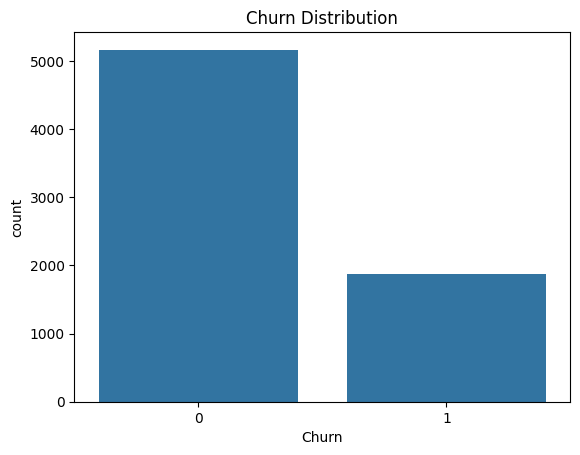

In [11]:
# Visualize Churn Distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


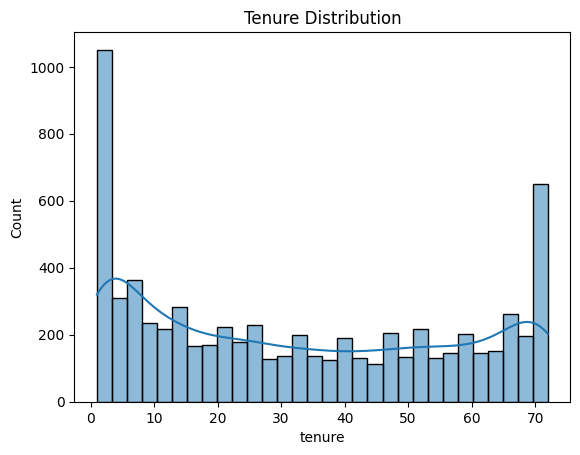

In [12]:
# Visualize Tenure Distribution
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.show()


In [13]:
# Define Features (X) and Target (y)
X = df.drop("Churn", axis=1)
y = df["Churn"]
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29,29,0,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,34,1,0,56,1889,0,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,0,2,1,1,53,108,1,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,0,45,0,0,42,1840,0,...,True,False,False,False,False,True,False,False,False,False
4,1,0,0,0,2,1,1,70,151,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84,1990,0,...,True,False,True,False,True,True,False,False,False,True
7039,1,0,1,1,72,1,1,103,7362,0,...,False,False,True,False,True,True,False,True,False,False
7040,1,0,1,1,11,0,1,29,346,0,...,False,False,False,False,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,74,306,1,...,False,False,False,False,False,False,False,False,False,True


In [14]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
#  Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled


array([[ 1.01378388, -0.43758982, -0.9624811 , ..., -0.52764485,
        -0.71475753, -0.54742719],
       [-0.98640353, -0.43758982, -0.9624811 , ...,  1.89521417,
        -0.71475753, -0.54742719],
       [ 1.01378388, -0.43758982,  1.03898144, ..., -0.52764485,
         1.39907586, -0.54742719],
       ...,
       [-0.98640353, -0.43758982, -0.9624811 , ..., -0.52764485,
         1.39907586, -0.54742719],
       [ 1.01378388, -0.43758982, -0.9624811 , ..., -0.52764485,
        -0.71475753, -0.54742719],
       [-0.98640353,  2.28524509,  1.03898144, ..., -0.52764485,
         1.39907586, -0.54742719]], shape=(5625, 30))

In [16]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train_scaled, y_train)
preds_lr = logreg.predict(X_test_scaled)

print("\n Logistic Regression Classification Report:")
print(classification_report(y_test, preds_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds_lr))
 
print("Accuracy:", accuracy_score(y_test, preds_lr))



 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407

Confusion Matrix:
[[733 300]
 [ 78 296]]
Accuracy: 0.7313432835820896


In [17]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
preds_rf = rf.predict(X_test)

print("\n📊 Random Forest Classification Report:")
print(classification_report(y_test, preds_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds_rf))
print("Accuracy:", accuracy_score(y_test, preds_rf))


📊 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

Confusion Matrix:
[[925 108]
 [192 182]]
Accuracy: 0.7867803837953091


In [18]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
preds_gb = gb.predict(X_test)

print("\n📊 Gradient Boosting Classification Report:")
print(classification_report(y_test, preds_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds_gb))
print("Accuracy:", accuracy_score(y_test, preds_gb))


📊 Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
[[934  99]
 [193 181]]
Accuracy: 0.7924662402274343


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:03<00:00, 26.48it/s]


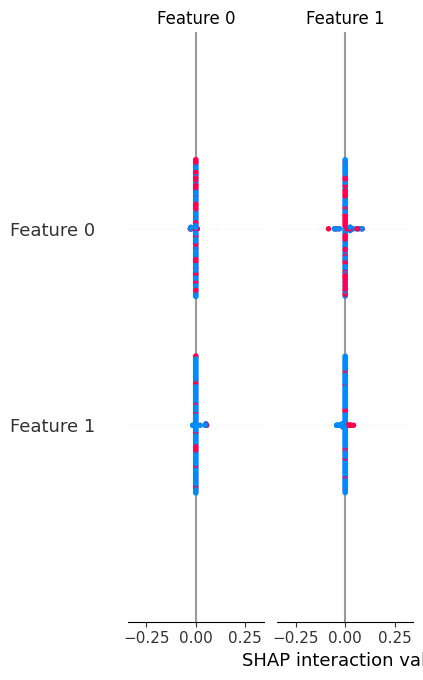

In [19]:
import shap
import matplotlib.pyplot as plt

# Sampling for SHAP
X_sample_small = shap.sample(X_test_scaled, 100)

# Explainer
explainer_lr = shap.KernelExplainer(logreg.predict_proba, X_sample_small)
shap_values_lr = explainer_lr.shap_values(X_sample_small, nsamples=100)

# If shap_values_lr is a list (e.g., [class_0, class_1]), use index 1
# If it's not a list, use it directly

if isinstance(shap_values_lr, list):
    shap.summary_plot(shap_values_lr[1], X_sample_small)
    shap.summary_plot(shap_values_lr[1], X_sample_small, plot_type="bar")
else:
    # shap.summary_plot(shap_values_lr, X_sample_small)
    shap.summary_plot(shap_values_lr, X_sample_small, plot_type="bar")


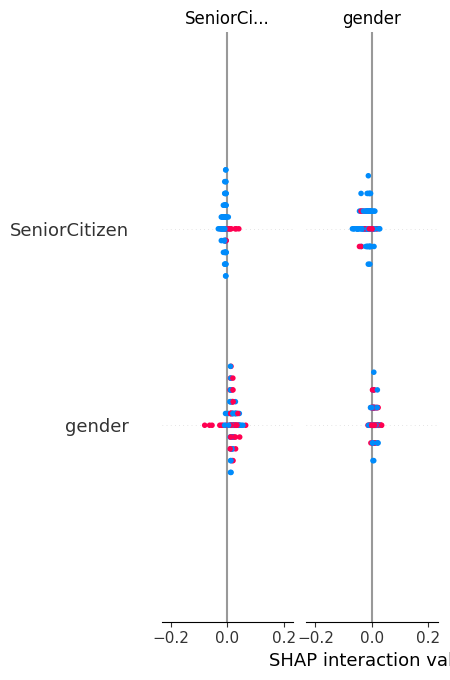

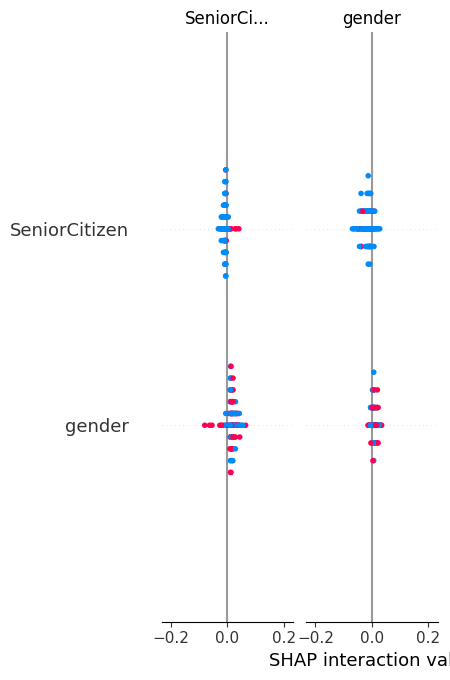

In [20]:
import shap
import matplotlib.pyplot as plt

# Step 1: Take a sample from your test data (not scaled)
X_sample = X_test.sample(100, random_state=42)

# Step 2: Create the SHAP explainer for Random Forest
explainer_rf = shap.TreeExplainer(rf)

# Step 3: Compute SHAP values
shap_values_rf = explainer_rf.shap_values(X_sample)

# Step 4: Check if list (for classification) or array (for regression)
if isinstance(shap_values_rf, list):
    shap.summary_plot(shap_values_rf[1], X_sample)
    shap.summary_plot(shap_values_rf[1], X_sample, plot_type="bar")
else:
    shap.summary_plot(shap_values_rf, X_sample)
    shap.summary_plot(shap_values_rf, X_sample, plot_type="bar")


SHAP class 1 shape: (30,)
X_sample shape: (100, 30)


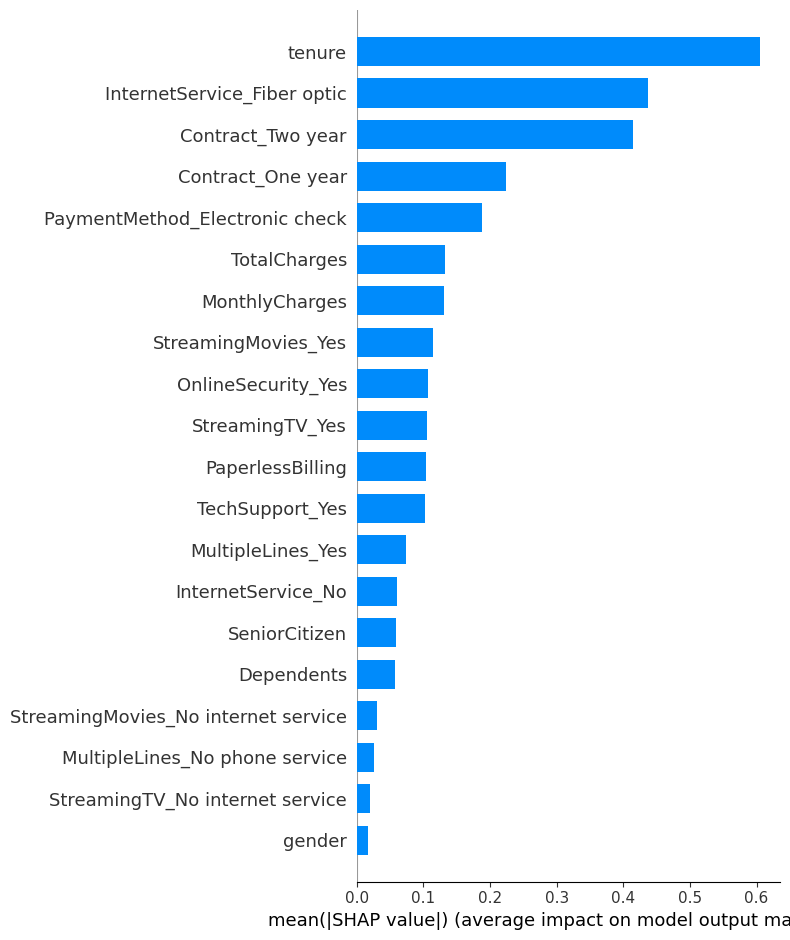

In [21]:
 

# Take a sample
X_sample = X_test.sample(100, random_state=42)

# Create TreeExplainer
explainer_gb = shap.TreeExplainer(gb)

# Compute SHAP values (returns a list of arrays, one per class)
shap_values_gb = explainer_gb.shap_values(X_sample)

# Check shape of SHAP values and X_sample
print("SHAP class 1 shape:", shap_values_gb[1].shape)
print("X_sample shape:", X_sample.shape)

# Use class 1 (churn = 1) for binary classification
# Plot using class 1 SHAP values (Churn = 1)
# shap.summary_plot(shap_values_gb, X_sample)
shap.summary_plot(shap_values_gb, X_sample, plot_type="bar")


